In [1]:
from simple_modflow.modflow.mf6.sfr import SFR
from pathlib import Path
import pickle
from simple_modflow.modflow.mf6.voronoiplus import VoronoiGridPlus as Vor
import figs as f
import pandas as pd
import flopy
import geopandas as gpd
from simple_modflow.modflow.mf6.mfsimbase import SimulationBase
import shapely as shp
import numpy as np

In [4]:
vor_path = Path(r'C:\Users\lukem\Python\MODFLOW\LakePointe\new_vor_lakepointe.vor')
with open(vor_path, 'rb') as file:
    vor: Vor = pickle.load(file)
with open(Path(r"C:\Users\lukem\Python\MODFLOW\LakePointe\LakePointe.model"),'rb') as file:
    model: SimulationBase = pickle.load(file)

In [3]:
input_path = Path(r'C:\Users\lukem\Python\MODFLOW\LakePointe\inputs')
stream = input_path / r'shp\rivers and streams\jenkins.shp'
sfr = SFR(vor=vor, stream_path=stream, model=model, reverse_stream=True)
array: np.ndarray = sfr.sfr_reach_data


initing sfr
getting reach data


[<AxesSubplot: title={'center': 'mf6_modelbotm layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modelbotm layer 2'}>,
 <AxesSubplot: title={'center': 'mf6_modelbotm layer 3'}>,
 <AxesSubplot: title={'center': 'mf6_modelstrt layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modelstrt layer 2'}>,
 <AxesSubplot: title={'center': 'mf6_modelstrt layer 3'}>,
 <AxesSubplot: title={'center': 'mf6_modeliconvert layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modeliconvert layer 2'}>,
 <AxesSubplot: title={'center': 'mf6_modeliconvert layer 3'}>,
 <AxesSubplot: title={'center': 'mf6_modelss layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modelss layer 2'}>,
 <AxesSubplot: title={'center': 'mf6_modelss layer 3'}>,
 <AxesSubplot: title={'center': 'mf6_modelsy layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modelsy layer 2'}>,
 <AxesSubplot: title={'center': 'mf6_modelsy layer 3'}>,
 <AxesSubplot: title={'center': 'mf6_modelicelltype layer 1'}>,
 <AxesSubplot: title={'center': 'mf6_modelicelltype

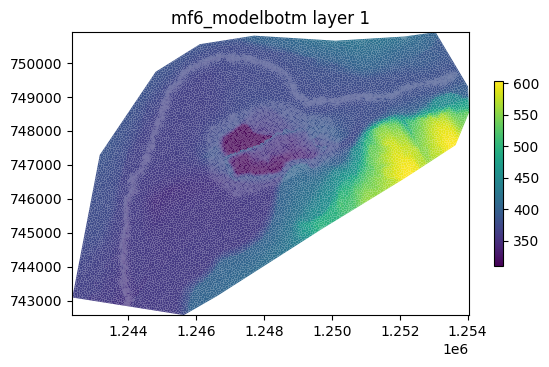

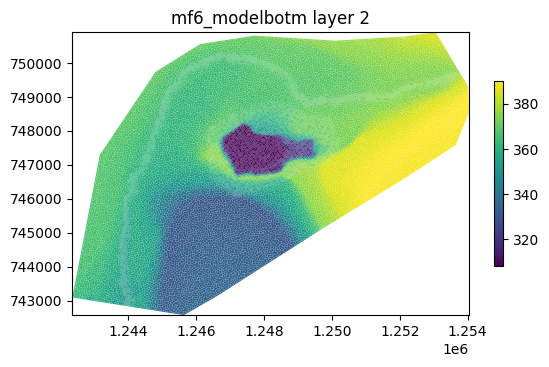

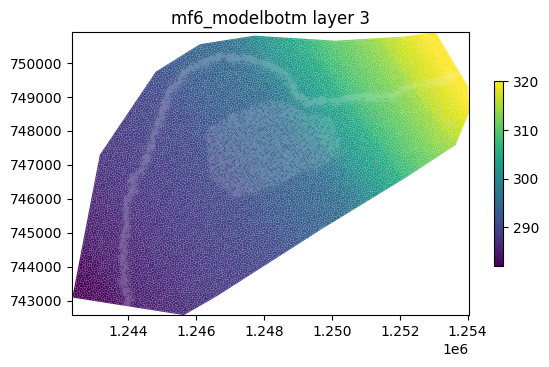

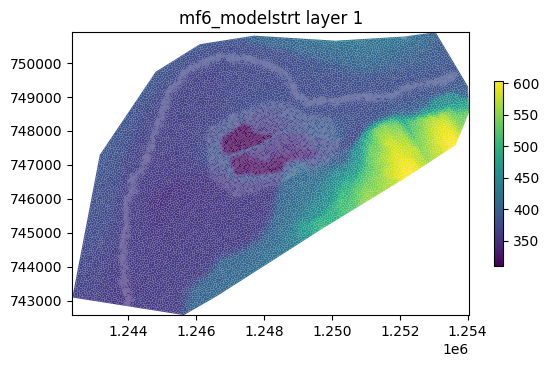

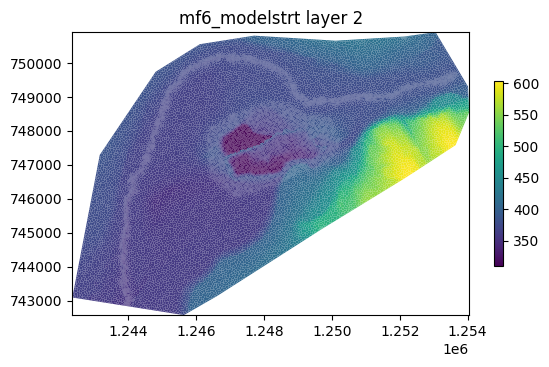

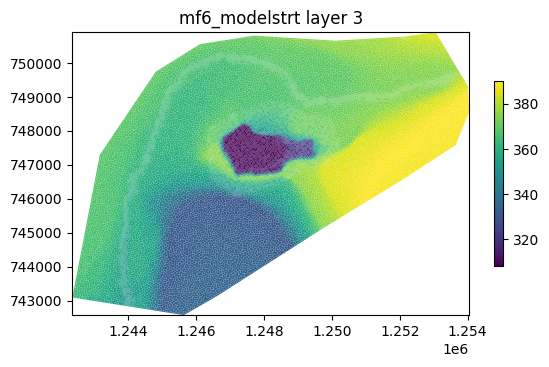

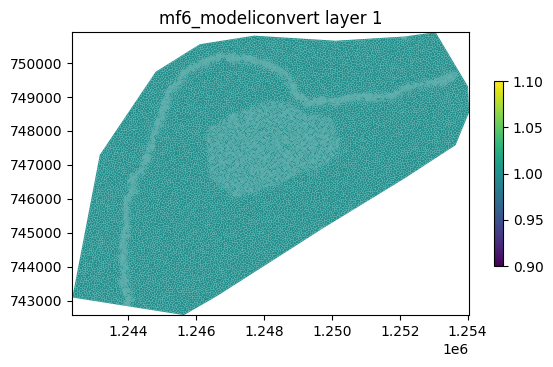

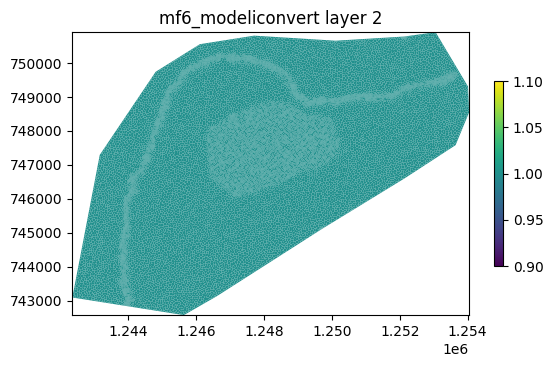

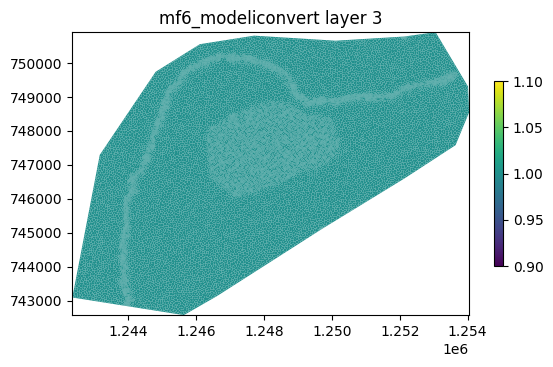

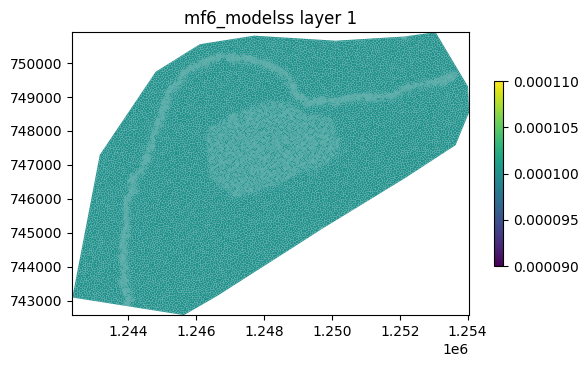

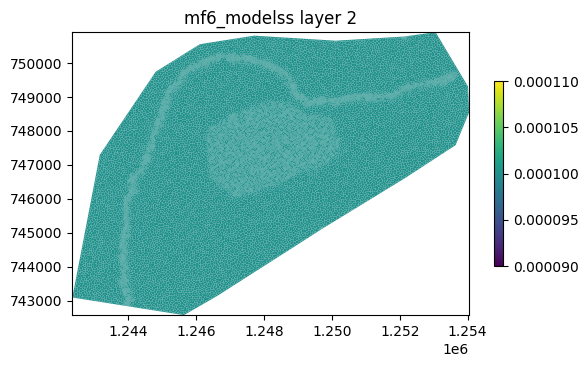

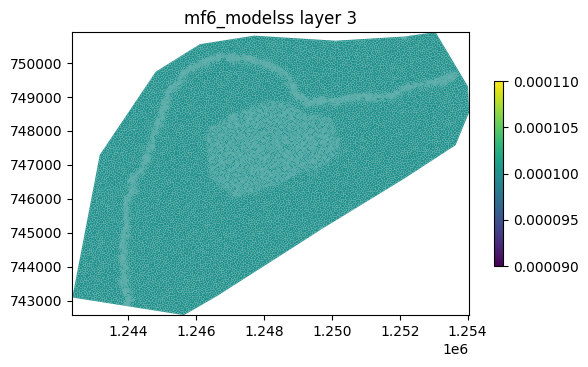

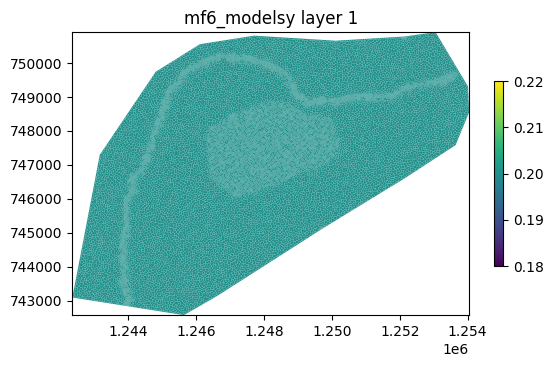

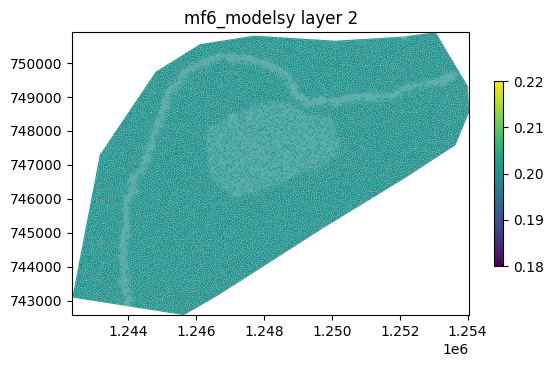

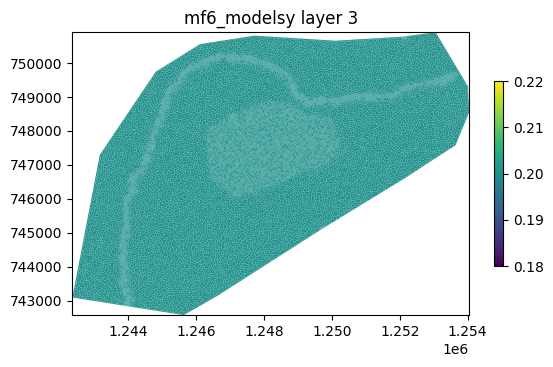

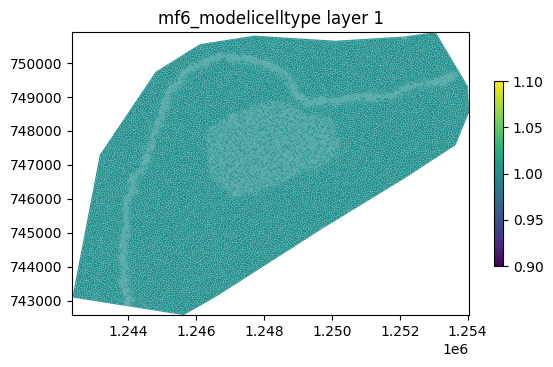

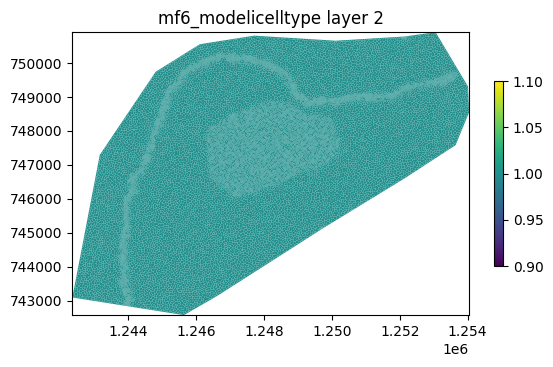

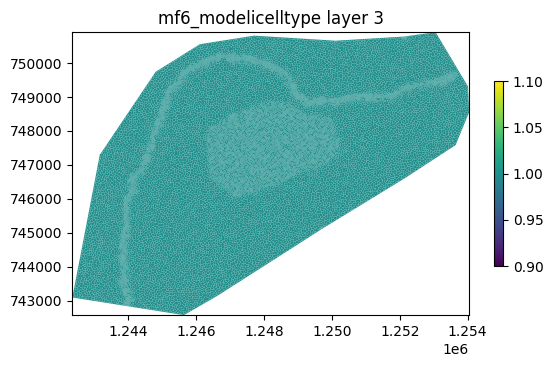

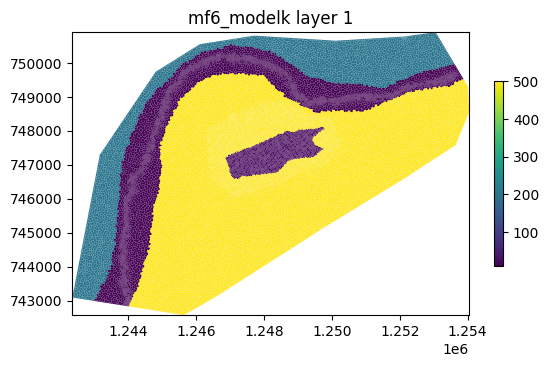

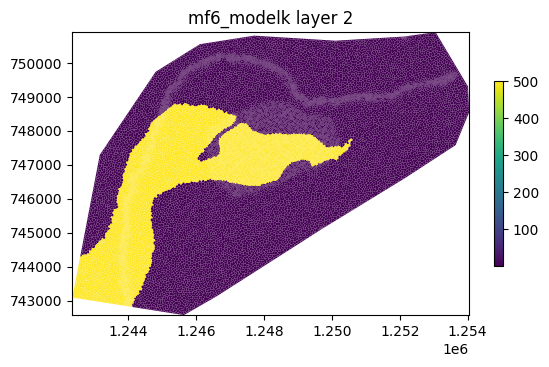

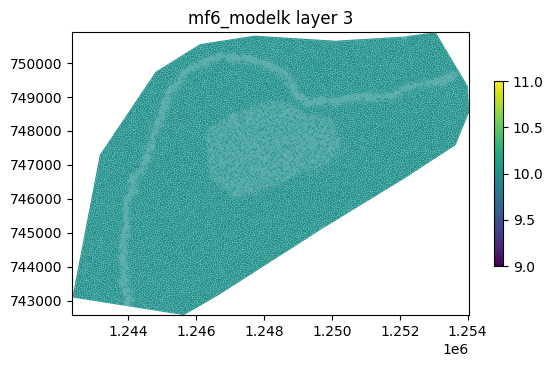

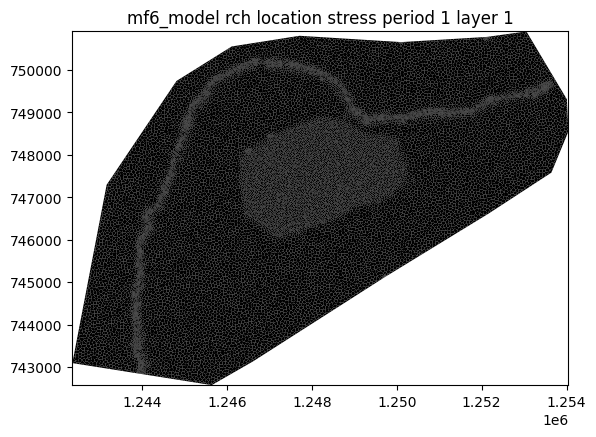

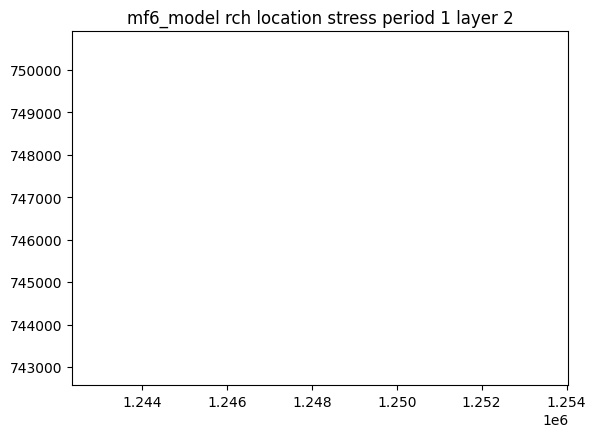

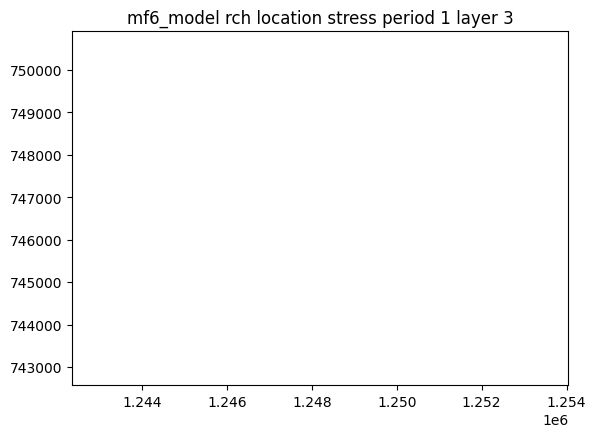

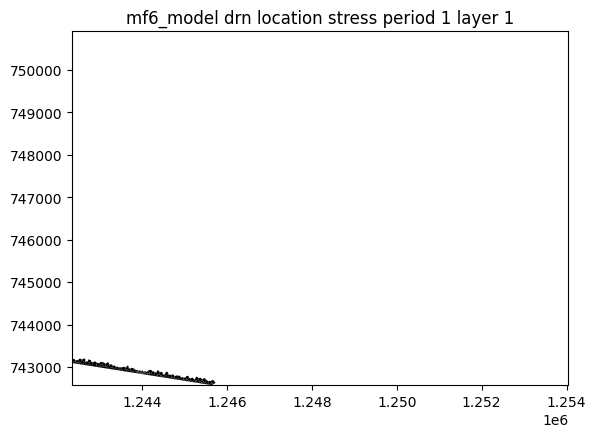

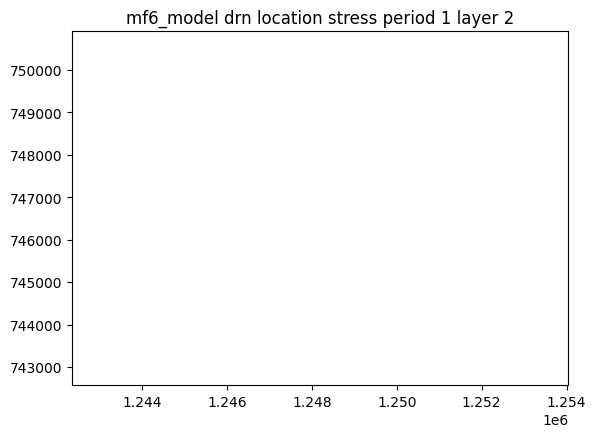

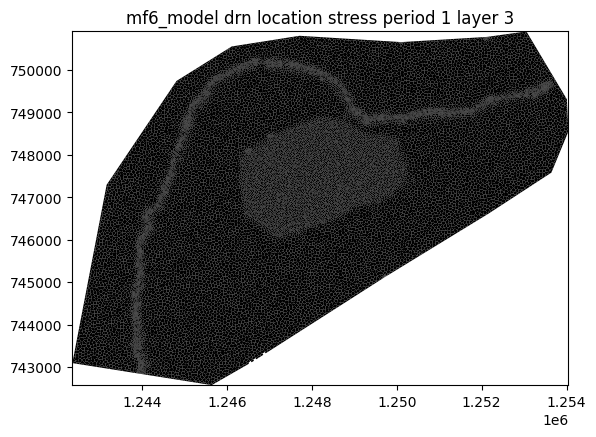

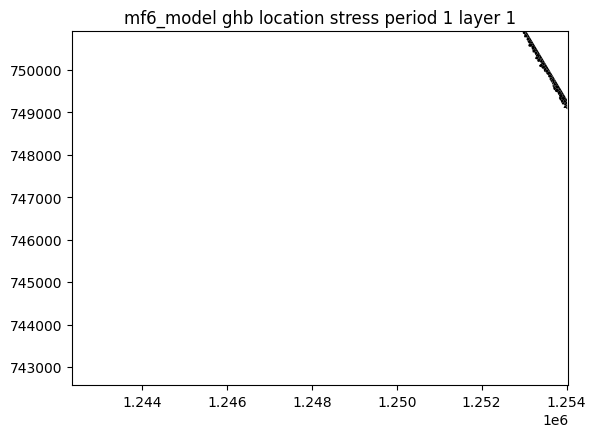

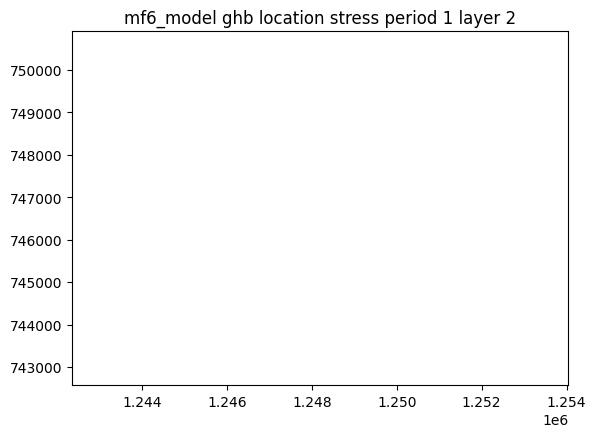

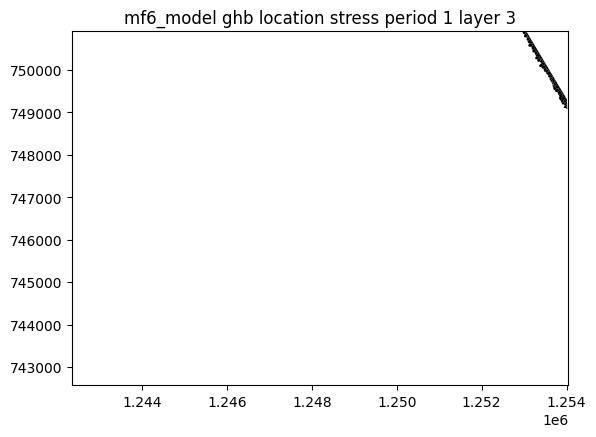

In [5]:
model.sim.plot()

In [11]:
flopy.utils.get_modflow(bindir=Path(r"C:\Users\lukem\AppData\Local\flopy\bin").as_posix())

fetched release '18.0' info from MODFLOW-USGS/executables
downloading 'https://github.com/MODFLOW-USGS/executables/releases/download/18.0/win64.zip' to 'C:\Users\lukem\Downloads\modflow_executables-18.0-win64.zip'
extracting 26 files to 'C:\Users\lukem\AppData\Local\flopy\bin'
crt.exe (1.3.1)         mflgrdbl.exe (2.0.0)    mt3dusgs.exe (1.1.0)
gridgen.exe (1.0.02)    mfnwt.exe (1.3.0)       sutra.exe (3.0)
gsflow.exe (2.2.1)      mfnwtdbl.exe (1.3.0)    swtv4.exe (4.00.05)
libmf6.dll (6.4.4)      mfusg.exe (1.5)         triangle.exe (1.6)
mf2000.exe (1.19.01)    mfusgdbl.exe (1.5)      vs2dt.exe (3.3)
mf2005.exe (1.12.00)    mfusg_gsi.exe (2.2.2)   zbud6.exe (6.4.4)
mf2005dbl.exe (1.12.00) mp6.exe (6.0.1)         zonbud3.exe (3.01)
mf6.exe (6.4.4)         mp7.exe (7.2.001)       zonbudusg.exe (1.5)
mflgr.exe (2.0.0)       mt3dms.exe (5.3.0)
updated flopy metadata file: 'C:\Users\lukem\AppData\Local\flopy\get_modflow.json'


In [55]:
cells, cells_df = sfr.get_sorted_cells_along_stream()
stream_cells = vor.gdf_topbtm.loc[cells, :][0].reset_index()
fig = f.Fig()
fig.add_scattergl(x=cells_df.distance_along_stream.to_list(), y=stream_cells[0])
fig.show()

In [31]:
vor.gdf_topbtm.loc[sfr.stream_cells, 0:1]

vor.gdf_topbtm.iloc[:, 1:] = vor.reconcile_surfaces()


In [37]:
vor.gdf_topbtm.iloc[:, 1:]

0           1           2           3
0      449.912323  419.487183  376.078400  310.274109
1      449.755707  419.487183  376.078400  310.274109
2      458.352570  416.289429  381.807922  317.640472
3      458.352570  416.170227  381.890228  317.693207
4      453.924164  402.744110  385.000000  320.000000
...           ...         ...         ...         ...
11062  399.656464  358.779785  332.096405  289.569275
11063  396.413177  359.034760  332.243042  289.611023
11064  390.442810  375.000000  333.659851  288.763611
11065  534.397644  531.808960  389.947418  311.464050
11066  540.541321  540.441321  390.000000  312.015472

[11067 rows x 4 columns]

In [36]:
vor.reconcile_surfaces()


0           1           2           3
0      449.912323  419.487183  376.078400  310.274109
1      449.755707  419.487183  376.078400  310.274109
2      458.352570  416.289429  381.807922  317.640472
3      458.352570  416.170227  381.890228  317.693207
4      453.924164  402.744110  385.000000  320.000000
...           ...         ...         ...         ...
11062  399.656464  358.779785  332.096405  289.569275
11063  396.413177  359.034760  332.243042  289.611023
11064  390.442810  375.000000  333.659851  288.763611
11065  534.397644  531.808960  389.947418  311.464050
11066  540.541321  540.441321  390.000000  312.015472

[11067 rows x 4 columns]

In [35]:
# vor.gdf_topbtm.loc[sfr.stream_cells, 0] = vor.gdf_topbtm.loc[sfr.stream_cells, 0] - 2
vor.gdf_topbtm


geometry           0           1           2  \
0      POINT (1250103.865 750653.361)  449.912323  419.487183  376.078400   
1      POINT (1250109.820 750652.905)  449.755707  419.487183  376.078400   
2      POINT (1252119.913 750775.585)  458.352570  416.289429  381.807922   
3      POINT (1252123.210 750775.921)  458.352570  416.170227  381.890228   
4      POINT (1253038.887 750872.210)  453.924164  402.744110  385.000000   
...                               ...         ...         ...         ...   
11062  POINT (1247062.371 745071.543)  399.656464  358.779785  332.096405   
11063  POINT (1247153.266 745014.129)  396.413177  359.034760  332.243042   
11064  POINT (1246819.912 744349.266)  390.442810  375.000000  333.659851   
11065  POINT (1252435.967 747804.615)  534.397644  531.808960  389.947418   
11066  POINT (1252515.874 747906.301)  540.541321  540.441321  390.000000   

                3  
0      310.274109  
1      310.274109  
2      317.640472  
3      317.693207  
4      320.000000  
...           ...  
11062  289.569275  
11063  289.611023  
11064  288.763611  
11065  311.464050  
11066  312.015472  

[11067 rows x 5 columns]

In [12]:
vor.gdf_topbtm.iloc[:, 1:].diff(axis=1)

0          1           2          3
0     NaN -30.425140  -43.408783 -65.804291
1     NaN -30.268524  -43.408783 -65.804291
2     NaN -42.063141  -34.481506 -64.167450
3     NaN -42.182343  -34.279999 -64.197021
4     NaN -51.180054  -17.744110 -65.000000
...    ..        ...         ...        ...
11062 NaN -40.876678  -26.683380 -42.527130
11063 NaN -37.378418  -26.791718 -42.632019
11064 NaN -15.442810  -41.340149 -44.896240
11065 NaN  -2.588684 -141.861542 -78.483368
11066 NaN  -0.651855 -149.889465 -77.984528

[11067 rows x 4 columns]

In [47]:
stream_cells = sfr.get_smoothed_reach_elevs(reverse=True)
d = pd.DataFrame.from_dict(stream_cells, orient='index', columns=[0])
vorb = vor.gdf_topbtm.update(d)
vor.gdf_topbtm[0][138]

354.80716

In [48]:
stream_cell_keys = list(stream_cells.keys())
fig =f.Fig()
fig.add_scattergl(x=list(range(len(stream_cells))), y=list(stream_cells.values()))
fig.show()

In [4]:
def generate_lak_period_data(num_stress_periods, lake_ids, lake_stages=None, rainfall_rates=None, evaporation_rates=None, withdrawals=None):
    """
    Generate period data for the MODFLOW 6 LAK package.

    Parameters:
    num_stress_periods (int): Number of stress periods.
    lake_ids (list of int): List of lake IDs.
    lake_stages (list of float, optional): List of lake stages for each stress period.
    rainfall_rates (list of float, optional): List of rainfall rates for each stress period.
    evaporation_rates (list of float, optional): List of evaporation rates for each stress period.
    withdrawals (list of float, optional): List of withdrawal rates for each stress period.

    Returns:
    dict: Dictionary of period data for the LAK package. Each key is a stress period number, and the value is a list of lists.
    """
    period_data = {}

    for period in range(num_stress_periods):
        period_data[period] = []

        for lake_id in lake_ids:
            lake_number = lake_id  # Assuming lake_id is already 0-based for FloPy

            laksetting = [lake_number]
            if lake_stages is not None:
                laksetting.extend(['stage', lake_stages[period]])
            if rainfall_rates is not None:
                laksetting.extend(['rainfall', rainfall_rates[period]])
            if evaporation_rates is not None:
                laksetting.extend(['evaporation', evaporation_rates[period]])
            if withdrawals is not None:
                laksetting.extend(['withdrawal', withdrawals[period]])

            period_data[period].append(laksetting)
    
    return period_data

# Example usage
num_stress_periods = 5  # Example number of stress periods
lake_ids = [0, 1]  # Example lake IDs
lake_stages = [100, 101, 102, 103, 104]  # Example lake stages for each stress period
rainfall_rates = [0.01, 0.02, 0.015, 0.01, 0.02]  # Example rainfall rates for each stress period
evaporation_rates = [0.005, 0.004, 0.006, 0.005, 0.004]  # Example evaporation rates for each stress period
withdrawals = [0.002, 0.003, 0.001, 0.002, 0.003]  # Example withdrawal rates for each stress period
import pandas as pd
lak_period_data = generate_lak_period_data(num_stress_periods, lake_ids, lake_stages, rainfall_rates, evaporation_rates, withdrawals)
pd.DataFrame.from_dict(lak_period_data)


0  \
0  [0, stage, 100, rainfall, 0.01, evaporation, 0...   
1  [1, stage, 100, rainfall, 0.01, evaporation, 0...   

                                                   1  \
0  [0, stage, 101, rainfall, 0.02, evaporation, 0...   
1  [1, stage, 101, rainfall, 0.02, evaporation, 0...   

                                                   2  \
0  [0, stage, 102, rainfall, 0.015, evaporation, ...   
1  [1, stage, 102, rainfall, 0.015, evaporation, ...   

                                                   3  \
0  [0, stage, 103, rainfall, 0.01, evaporation, 0...   
1  [1, stage, 103, rainfall, 0.01, evaporation, 0...   

                                                   4  
0  [0, stage, 104, rainfall, 0.02, evaporation, 0...  
1  [1, stage, 104, rainfall, 0.02, evaporation, 0...